# Problem Sheet 5 - Nonnegative Matrix Factorization
**Submission until Dezember 5 at 5 p.m. in the corresponding folder in StudIP.** \
In this exercise we consider the Nonnegative Matrix Factorization (NMF) of a matrix $A\in\mathbb{R}^{m,n}$, $A_{i,j}\geq 0$, into
$$
A \approx WH
$$
with $W\in\mathbb{R}^{m,r}$ and $H\in\mathbb{R}^{r,n}$ and additionally $W,H\geq 0$ componentwise.

In [2]:
import numpy as np
from scipy import linalg as la
from scipy import optimize
import numpy.matlib

#initialize (pseudo) random number generator for reproducible results
np.random.seed(1234)

#build random 20x10 matrix
m=20
n=10
A=np.random.rand(m,n)

## Nonnegative Matrix Factorization using Alternating Least Squares (ALS)

**Task: Implement the NMF using ALS. (4/4 Points)**

ALS in each iteration of NMF:
*   First, compute $W:= \max \left\{ \underset{\tilde{W}\in\mathbb{R}^{m,r}}{\arg\min} \|{A-\tilde{W}H}\|_F, 0 \right\}$ with component-wise $\max$.
*   Then, compute $H:= \max \left\{ \underset{\tilde{H}\in\mathbb{R}^{r,n}}{\arg\min} \|{A-W\tilde{H}}\|_F, 0 \right\}$ with component-wise $\max$.

**Hint:** For the general problem $\underset{S}{\arg\min} \|{A-GSK^T}\|_F^2$, the derivative is given by
$$
\frac{\mathrm{d}}{\mathrm{d}S} \frac{1}{2} \|GSK^T - A\|_F^2 = G^T(GSK^T-A)K
$$
and is equal to zero for
$$
 \hat{S} = (G^TG)^{-1} G^T A \, K (K^T K)^{-1}.
$$
You can use this for the update of $W$ and $H$ by setting the factors $G$ and $K^T$ to the identity, respectively.

In [2]:
#NMF based on Alternating Least Squares (ALS)
def nmf_als(A,r,maxit=15,rel_stopping=1e-3):
    m,n = A.shape
    W=np.random.rand(m,r)
    H=np.random.rand(r,n)
    
    for it in range(maxit): 
        
        # Update W
        W = A @ H.T @ np.linalg.inv(H @ H.T)
        # Update H
        H = np.linalg.inv(W.T @ W) @ W.T @ A

        # Optional: Check stopping criterion
        if it > 0:
            rel_change = np.linalg.norm(A - np.dot(W, H), 'fro') / np.linalg.norm(A, 'fro')
            if rel_change < rel_stopping:
                print('Converged at iteration', it + 1)
                break
        print('nmf_als iter:', it+1)
    return W,H

Test your code. The output should be around 0.25:

In [3]:
W,H = nmf_als(A,5,50,1e-16)
print("Reconstruction Error: ",np.linalg.norm(A-W@H,'fro') / np.linalg.norm(A,'fro'))

nmf_als iter: 1
nmf_als iter: 2
nmf_als iter: 3
nmf_als iter: 4
nmf_als iter: 5
nmf_als iter: 6
nmf_als iter: 7
nmf_als iter: 8
nmf_als iter: 9
nmf_als iter: 10
nmf_als iter: 11
nmf_als iter: 12
nmf_als iter: 13
nmf_als iter: 14
nmf_als iter: 15
nmf_als iter: 16
nmf_als iter: 17
nmf_als iter: 18
nmf_als iter: 19
nmf_als iter: 20
nmf_als iter: 21
nmf_als iter: 22
nmf_als iter: 23
nmf_als iter: 24
nmf_als iter: 25
nmf_als iter: 26
nmf_als iter: 27
nmf_als iter: 28
nmf_als iter: 29
nmf_als iter: 30
nmf_als iter: 31
nmf_als iter: 32
nmf_als iter: 33
nmf_als iter: 34
nmf_als iter: 35
nmf_als iter: 36
nmf_als iter: 37
nmf_als iter: 38
nmf_als iter: 39
nmf_als iter: 40
nmf_als iter: 41
nmf_als iter: 42
nmf_als iter: 43
nmf_als iter: 44
nmf_als iter: 45
nmf_als iter: 46
nmf_als iter: 47
nmf_als iter: 48
nmf_als iter: 49
nmf_als iter: 50
Reconstruction Error:  0.2136061933394511


Next, we consider images from a face database.

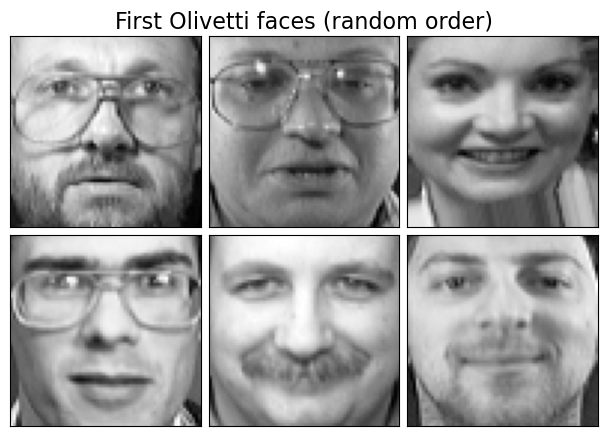

In [3]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

def plot_gallery(title, images, n_row=2, n_col=3, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape(image_shape), cmap=cmap)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = np.random.RandomState(0)

# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

plot_gallery("First Olivetti faces (random order)", faces[:n_components])

**Task: Run the following code, which uses your implementation of the NMF with ALS, several times. Why are the images showing columns of $W$ different each time? (0/2 Points)**

**ANS.: Each time we get different columns of W because we haven't used `random.seed` for W, so each time our random W is different.** #correction. this is not sufficient.

In [5]:
X = faces.T

W, H = nmf_als(X,3,50,1e-16)

print(W)
print(H)

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(W[:,0],(64,64)),cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(np.reshape(W[:,1],(64,64)),cmap=plt.cm.gray)
plt.show()

NameError: name 'faces' is not defined

## NMF with Multiplicative Updates
**Task: Implement the NMF using Multiplicative Updates (instead of ALS). Compare the different approaches numerically. (6/6 Points)**

In [5]:
#NMF based on multiplicative updates
def nmf_multiplicative(A,r,maxit=15,rel_stopping=1e-3):
    m,n = A.shape
    W=np.random.rand(m,r)
    H=np.random.rand(r,n)
    e = 1.0e-10
    for it in range(maxit):
        
        #update H
        W_TA = W.T@A
        W_TWH = W.T @ W @ H+e
        for i in range(np.size(H, 0)):
            for j in range(np.size(H, 1)):
                H[i, j] = H[i, j] * W_TA[i, j] / W_TWH[i, j]
                
        # Update W
        AH_T = A@H.T
        WHH_T =  W@H@H.T+ e

        for i in range(np.size(W, 0)):
            for j in range(np.size(W, 1)):
                W[i, j] = W[i, j] * AH_T[i, j] / WHH_T[i, j]

        
        #optional:
        #if stopping criterion: break
        if it > 0:
            rel_change = np.linalg.norm(A - np.dot(W, H), 'fro') / np.linalg.norm(A, 'fro')
            if rel_change < rel_stopping:
                print('Converged at iteration', it + 1)
                break
    print('nmf_multiplicative iter:', it+1)
    return W,H

In [49]:
# import time

# # ALS method
# start_time = time.time()
# W_als, H_als = nmf_als(A, r)
# als_runtime = time.time() - start_time

# # Multiplicative Updates method
# start_time = time.time()
# W_mu, H_mu = nmf_multiplicative(A, r)
# mu_runtime = time.time() - start_time


# reconstruction_error_als = np.linalg.norm(A - W_als @ H_als, 'fro')
# reconstruction_error_mu = np.linalg.norm(A - W_mu @ H_mu, 'fro')
# print(f"ALS - Runtime: {als_runtime:.4f}s, Reconstruction Error: {reconstruction_error_als:.4f}")
# print(f"Multiplicative - Runtime: {mu_runtime:.4f}s, Reconstruction Error: {reconstruction_error_mu:.4f}")


nmf_als iter: 1
nmf_als iter: 2
nmf_als iter: 3
nmf_als iter: 4
nmf_als iter: 5
nmf_als iter: 6
nmf_als iter: 7
nmf_als iter: 8
nmf_als iter: 9
nmf_als iter: 10
nmf_als iter: 11
nmf_als iter: 12
nmf_als iter: 13
nmf_als iter: 14
nmf_als iter: 15
nmf_multiplicative iter: 15
ALS - Runtime: 0.0061s, Reconstruction Error: 1.8133
Multiplicative - Runtime: 0.0145s, Reconstruction Error: 2.4754


In [6]:
import time
import numpy as np

def compare_nmf_methods(A, r, nmf_als, nmf_multiplicative, maxit=15, rel_stopping=1e-3):
    # Method 1
    start_time = time.time()
    W1, H1 = nmf_als(A, r, maxit, rel_stopping)
    runtime1 = time.time() - start_time
    reconstruction_error1 = np.linalg.norm(A - np.dot(W1, H1), 'fro')/ np.linalg.norm(A,'fro')

    # Method 2
    start_time = time.time()
    W2, H2 = nmf_multiplicative(A, r, maxit, rel_stopping)
    runtime2 = time.time() - start_time
    reconstruction_error2 = np.linalg.norm(A - np.dot(W2, H2), 'fro')/ np.linalg.norm(A,'fro')

    # Print results
    print(f"Method 1 - Runtime: {runtime1:.4f}s, Reconstruction Error: {reconstruction_error1:.4f}")
    print(f"Method 2 - Runtime: {runtime2:.4f}s, Reconstruction Error: {reconstruction_error2:.4f}")

# Compare ALS and Multiplicative Updates
compare_nmf_methods(A,5, nmf_als, nmf_multiplicative)


nmf_als iter: 1
nmf_als iter: 2
nmf_als iter: 3
nmf_als iter: 4
nmf_als iter: 5
nmf_als iter: 6
nmf_als iter: 7
nmf_als iter: 8
nmf_als iter: 9
nmf_als iter: 10
nmf_als iter: 11
nmf_als iter: 12
nmf_als iter: 13
nmf_als iter: 14
nmf_als iter: 15
nmf_multiplicative iter: 15
Method 1 - Runtime: 0.0038s, Reconstruction Error: 0.2136
Method 2 - Runtime: 0.0084s, Reconstruction Error: 0.3350


## Initialization of $W$ and $H$ by SVD
**Task: Implement another version of NMF using ALS and the initialization strategy of $W$ and $H$ based on the SVD (for further look see [C. Boutsidis and E. Gallopoulos: SVD based initialization](https://www.cb.uu.se/~milan/histo/before2011august/Boutsidis.pdf)). Test your implementation. (8/8 Points)**

**Hint:** For given data $A \in \mathbb{R}^{m \times n} $ the initialization strategy of $W$ and $H$ based on the SVD for rank $k$ is defined as follows. \
Consider
$$
A \approx U_{k} \Sigma_{k} V_{k}^{T},
$$
where $u_{i}$ are the columns of $U$ and $v_{i}$ are the columns of $V$.\
Let
$$
W = \left( w_{1}, \cdots, w_{k} \right) \in \mathbb{R}^{m \times k}, \\
H = \left( h_{1}, \cdots, h_{k} \right)^{T} \in \mathbb{R}^{k \times n},
$$
where $w_{i}$ are the columns of $W$ and $h_{i}$ are the rows of $H$.

For $i = 1,\ldots,k$, we set $u_i^+ = \max(0,u_i)$ and $u_i^- = \max(0,-u_i)$ (and analogously for $v_i^+$ and $v_i^-$)
and we set
\begin{align}
w_i &= \begin{cases}
\sqrt{\sigma_{i} \| u_i^+ \| \| v_i^+ \|} \ \dfrac{u_i^+}{\| u_i^+ \| \| v_i^+ \|} & \text{ if } \| u_i^+ \| \| v_i^+ \| \geq \| u_i^- \| \| v_i^- \| \\
\sqrt{\sigma_{i} \| u_i^- \| \| v_i^- \|} \dfrac{ u_i^-}{\| u_i^- \| \| v_i^- \| } & \text{ else }
\end{cases} \\
h_i &= \begin{cases}
\sqrt{\sigma_{i} \| u_i^+ \| \| v_i^+ \|} \ \dfrac{v_i^+}{\| u_i^+ \| \| v_i^+ \|} & \text{ if } \| u_i^+ \| \| v_i^+ \| \geq \| u_i^- \| \| v_i^- \| \\
\sqrt{\sigma_{i} \| u_i^- \| \| v_i^- \|} \ \dfrac{ v_i^-}{\| u_i^- \| \| v_i^- \| } & \text{ else }
\end{cases}
\end{align}

In [8]:
# initialis W and H base on SVD
U, Sigma, VT = np.linalg.svd(A, full_matrices=False)
w_list = [] 
h_list=[]
for i in range (len(Sigma)):
    U_pluse=np.maximum(0,U[:,i])
    U_min=np.maximum(0,-U[:,i])
    V_pluse=np.maximum(0,VT.T[:,i])
    V_min=np.maximum(0,-VT.T[:,i])
    U_pluse_norm=np.linalg.norm(U_pluse)
    U_min_norm=np.linalg.norm(U_min)
    V_pluse_norm=np.linalg.norm(V_pluse)
    V_min_norm=np.linalg.norm(V_min)
    if U_pluse_norm*V_pluse_norm >= U_min_norm*V_min_norm:
        w=(np.sqrt(Sigma[i]*U_pluse_norm*V_pluse_norm)*U_pluse)/(U_pluse_norm*V_pluse_norm)
    else :
        w=(np.sqrt(Sigma[i]*U_min_norm*V_min_norm)*U_min)/(U_min_norm*V_min_norm)
            
    if U_pluse_norm*V_pluse_norm >= U_min_norm*V_min_norm:
        h=(np.sqrt(Sigma[i]*U_pluse_norm*V_pluse_norm)*V_pluse)/(U_pluse_norm*V_pluse_norm)
    else :
        h=(np.sqrt(Sigma[i]*U_min_norm*V_min_norm)*V_min)/(U_min_norm*V_min_norm)    
    w_list.append(w) 
    h_list.append(h)
    
W = np.column_stack(w_list) 
H=np.column_stack(h_list)

In [9]:
def nmf_als_regularized(A, r, W, H, lambda_W=0.01, lambda_H=0.01, maxit=15, rel_stopping=1e-3):
    m, n = A.shape

    for it in range(maxit):
        # Save current W and H for comparison
        W_prev, H_prev = np.copy(W), np.copy(H)

        # Update H while fixing W with L2 regularization
        for j in range(n):
            H[:, j] = np.linalg.solve(W.T@ W + lambda_H * np.eye(r), W.T @ A[:, j])

        # Update W while fixing H with L2 regularization
        for i in range(m):
            W[i, :] = np.linalg.solve(H @ H.T + lambda_W * np.eye(r), A[i, :] @ H.T)

        # Calculate Frobenius norm of the changes in W and H
        change_W = np.linalg.norm(W - W_prev, 'fro')
        change_H = np.linalg.norm(H - H_prev, 'fro')

        # Optional: Check stopping criterion
        if it > 0:
            rel_change = np.linalg.norm(A - W @ H, 'fro') / np.linalg.norm(A, 'fro')
            print(f'Iteration {it+1 } - Change in W: {change_W:.4f}, Change in H: {change_H:.4f}, Relative Change: {rel_change:.4f}')

            if rel_change < rel_stopping:
                print('Converged at iteration', it + 1)
                break

    print('nmf_als_regularized iteretaion is completed')

    return W, H


In [107]:
# initialis W and H base on SVD
U, Sigma, VT = np.linalg.svd(A, full_matrices=False)
w_list = [] 
h_list=[]
for i in range (len(Sigma)):
    U_pluse=np.maximum(0,U[:,i])
    U_min=np.maximum(0,-U[:,i])
    V_pluse=np.maximum(0,VT.T[:,i])
    V_min=np.maximum(0,-VT.T[:,i])
    U_pluse_norm=np.linalg.norm(U_pluse)
    U_min_norm=np.linalg.norm(U_min)
    V_pluse_norm=np.linalg.norm(V_pluse)
    V_min_norm=np.linalg.norm(V_min)
    if U_pluse_norm*V_pluse_norm >= U_min_norm*V_min_norm:
        w=(np.sqrt(Sigma[i]*U_pluse_norm*V_pluse_norm)*U_pluse)/(U_pluse_norm*V_pluse_norm)
    else :
        w=(np.sqrt(Sigma[i]*U_min_norm*V_min_norm)*U_min)/(U_min_norm*V_min_norm)
        
    if U_pluse_norm*V_pluse_norm >= U_min_norm*V_min_norm:
        h=(np.sqrt(Sigma[i]*U_pluse_norm*V_pluse_norm)*V_pluse)/(U_pluse_norm*V_pluse_norm)
    else :
        h=(np.sqrt(Sigma[i]*U_min_norm*V_min_norm)*V_min)/(U_min_norm*V_min_norm)    
    w_list.append(w) 
    h_list.append(h)
    
W = np.column_stack(w_list) 
H=np.column_stack(h_list)

In [10]:
W,H =  nmf_als_regularized(A,10, W, H, lambda_W=0.01, lambda_H=0.01, maxit=15, rel_stopping=1e-3)
print("Reconstruction Error is: ",np.linalg.norm(A-W@H,'fro') / np.linalg.norm(A,'fro'))

Iteration 2 - Change in W: 0.0337, Change in H: 0.0655, Relative Change: 0.0041
Iteration 3 - Change in W: 0.0324, Change in H: 0.0604, Relative Change: 0.0041
Iteration 4 - Change in W: 0.0312, Change in H: 0.0560, Relative Change: 0.0040
Iteration 5 - Change in W: 0.0301, Change in H: 0.0520, Relative Change: 0.0040
Iteration 6 - Change in W: 0.0290, Change in H: 0.0486, Relative Change: 0.0040
Iteration 7 - Change in W: 0.0280, Change in H: 0.0455, Relative Change: 0.0039
Iteration 8 - Change in W: 0.0270, Change in H: 0.0427, Relative Change: 0.0039
Iteration 9 - Change in W: 0.0261, Change in H: 0.0402, Relative Change: 0.0039
Iteration 10 - Change in W: 0.0252, Change in H: 0.0380, Relative Change: 0.0039
Iteration 11 - Change in W: 0.0243, Change in H: 0.0359, Relative Change: 0.0039
Iteration 12 - Change in W: 0.0235, Change in H: 0.0340, Relative Change: 0.0038
Iteration 13 - Change in W: 0.0227, Change in H: 0.0323, Relative Change: 0.0038
Iteration 14 - Change in W: 0.0220, 

## Total Points 18/20